In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


In [4]:
Navid = True
Taimoor = False

if Navid:
    data_tracers = xr.open_mfdataset("/g/data/v45/nc3020/ASC-idealised/ASC_outputs/asc_channel_GPU_tracers.nc")
    data_velocities = xr.open_mfdataset("/g/data/v45/nc3020/ASC-idealised/ASC_outputs/asc_channel_GPU_velocities.nc")
elif Taimoor:
    data_tracers = xr.open_mfdataset("/g/data/hh5/tmp/txs156/ASC-idealised/ASC_outputs/asc_channel_tracers.nc")
    data_velocities = xr.open_mfdataset("/g/data/hh5/tmp/txs156/ASC-idealised/ASC_outputs/asc_channel_velocities.nc")



## TOP Surface plots (Tracers + Velocities)

In [75]:
Lx = 500000
Ly = 600000
AR = Lx/Ly

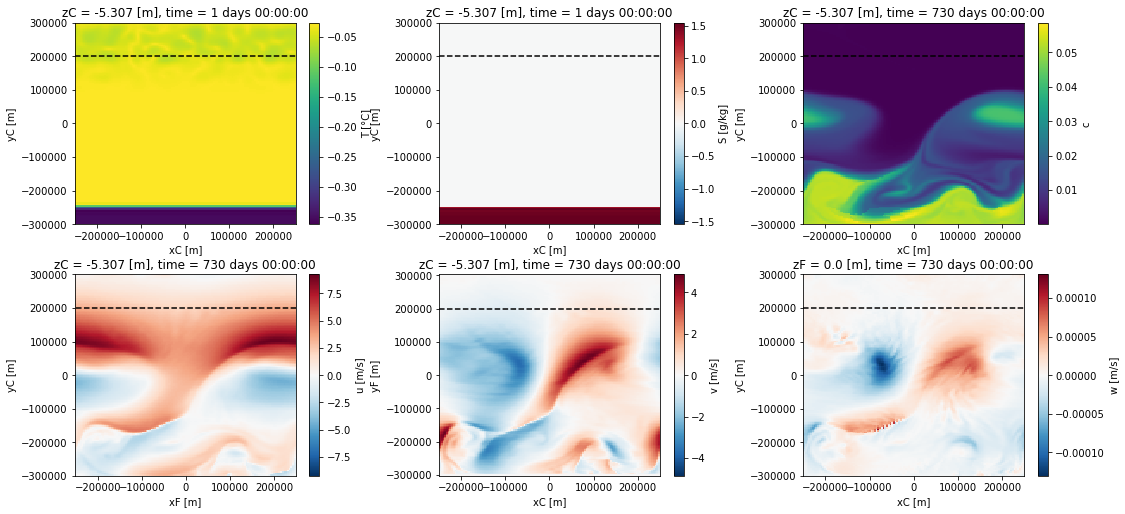

In [135]:
fig, axs = plt.subplots(2,3, figsize=(1/AR*5*3,AR*5*2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=0.32)
axs = axs.ravel() 

data_tracers.T.isel(time=1).isel(zC=-1).plot(ax=axs[0])
data_tracers.S.isel(time=1).isel(zC=-1).plot(ax=axs[1])
data_tracers.c.isel(time=-1, zC=-1).plot(ax=axs[2])
data_velocities.u.isel(time=-1).isel(zC=-1).plot(ax=axs[3])
data_velocities.v.isel(time=-1).isel(zC=-1).plot(ax=axs[4])
data_velocities.w.isel(time=-1, zF=-1).plot(ax=axs[5])
for i in range(6):
    axs[i].plot([-250000,250000],[200000,200000], '--k')
plt.savefig('top_view_t_final.png', bbox_inches='tight', dpi=300)
plt.show()

## Zonally Averaged plots

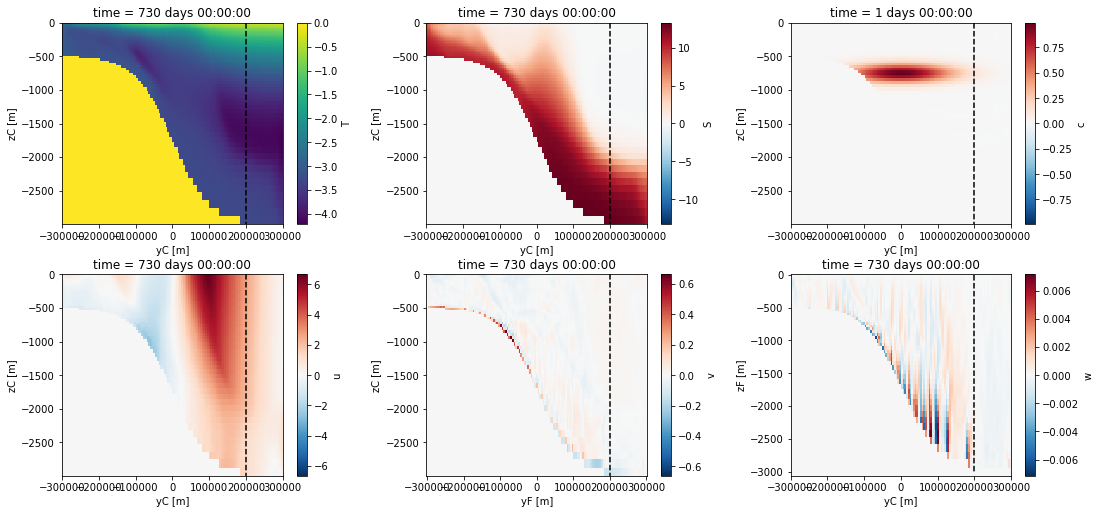

In [136]:
fig, axs = plt.subplots(2,3, figsize=(1/AR*5*3,AR*5*2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=0.32)
axs = axs.ravel() 

data_tracers.T.isel(time=-1).mean('xC').plot(ax=axs[0])
data_tracers.S.isel(time=-1).mean('xC').plot(ax=axs[1])
data_tracers.c.isel(time=1).mean('xC').plot(ax=axs[2])
data_velocities.u.isel(time=-1).mean('xF').plot(ax=axs[3])
data_velocities.v.isel(time=-1).mean('xC').plot(ax=axs[4])
data_velocities.w.isel(time=-1).mean('xC').plot(ax=axs[5])
for i in range(6):
    axs[i].plot([200000,200000],[0,-3000], '--k')
plt.savefig('Zonally_avg_plots_t_final.png', dpi=300, bbox_inches='tight')
plt.show()

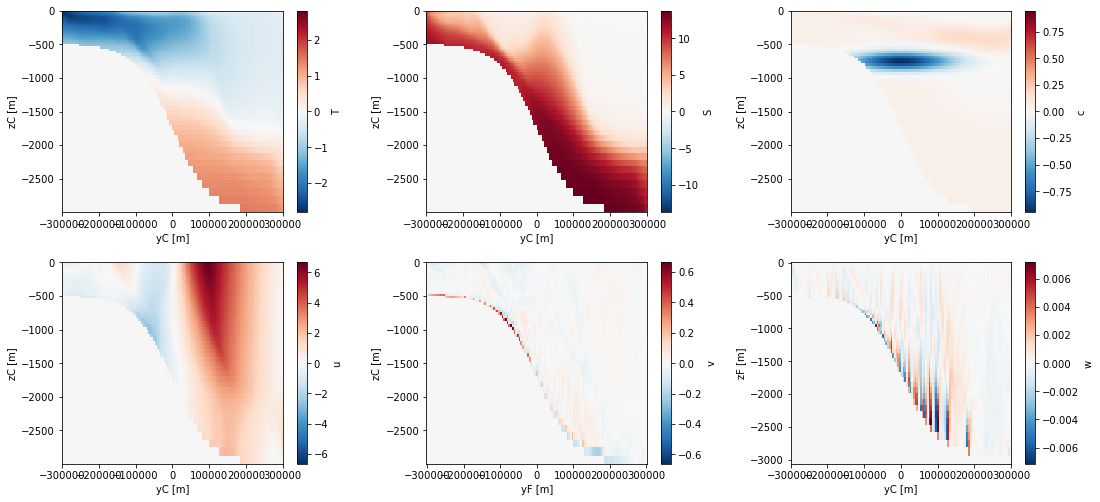

In [83]:
fig, axs = plt.subplots(2,3, figsize=(1/AR*5*3,AR*5*2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=0.32)
axs = axs.ravel() 

(data_tracers.T.isel(time=-1).mean('xC')-data_tracers.T.isel(time=0).mean('xC')).plot(ax=axs[0])
(data_tracers.S.isel(time=-1).mean('xC')-data_tracers.S.isel(time=0).mean('xC')).plot(ax=axs[1])
(data_tracers.c.isel(time=-1).mean('xC')-data_tracers.c.isel(time=0).mean('xC')).plot(ax=axs[2])
(data_velocities.u.isel(time=-1).mean('xF')-data_velocities.u.isel(time=0).mean('xF')).plot(ax=axs[3])
(data_velocities.v.isel(time=-1).mean('xC')-data_velocities.v.isel(time=0).mean('xC')).plot(ax=axs[4])
(data_velocities.w.isel(time=-1).mean('xC')-data_velocities.w.isel(time=0).mean('xC')).plot(ax=axs[5])
for i in range(6):
    axs[i].plot([200000,200000],[0,-3000], '--k')

plt.show()

## Horizontally-averaged plots

In [144]:
T_evolution = data_tracers.T.mean('xC').mean('yC').values
S_evolution = data_tracers.S.mean('xC').mean('yC').values
c_evolution = data_tracers.c.mean('xC').mean('yC').values
u_evolution = data_velocities.u.mean('xF').mean('yC').values
v_evolution = data_velocities.v.mean('xC').mean('yF').values
w_evolution = data_velocities.w.mean('xC').mean('yC').values

T_anomaly_profile = np.zeros_like(T_evolution)
S_anomaly_profile = np.zeros_like(S_evolution)
c_anomaly_profile = np.zeros_like(c_evolution)
u_anomaly_profile = np.zeros_like(u_evolution)
v_anomaly_profile = np.zeros_like(v_evolution)
w_anomaly_profile = np.zeros_like(w_evolution)

for i in range(T_evolution.shape[0]):
    T_anomaly_profile[i,:] = T_evolution[i,:] - T_evolution[i,0]
    S_anomaly_profile[i,:] = S_evolution[i,:] - S_evolution[i,0]
    c_anomaly_profile[i,:] = c_evolution[i,:] - c_evolution[i,0]
    u_anomaly_profile[i,:] = u_evolution[i,:] - u_evolution[i,0]
    v_anomaly_profile[i,:] = v_evolution[i,:] - v_evolution[i,0]
    w_anomaly_profile[i,:] = w_evolution[i,:] - w_evolution[i,0]

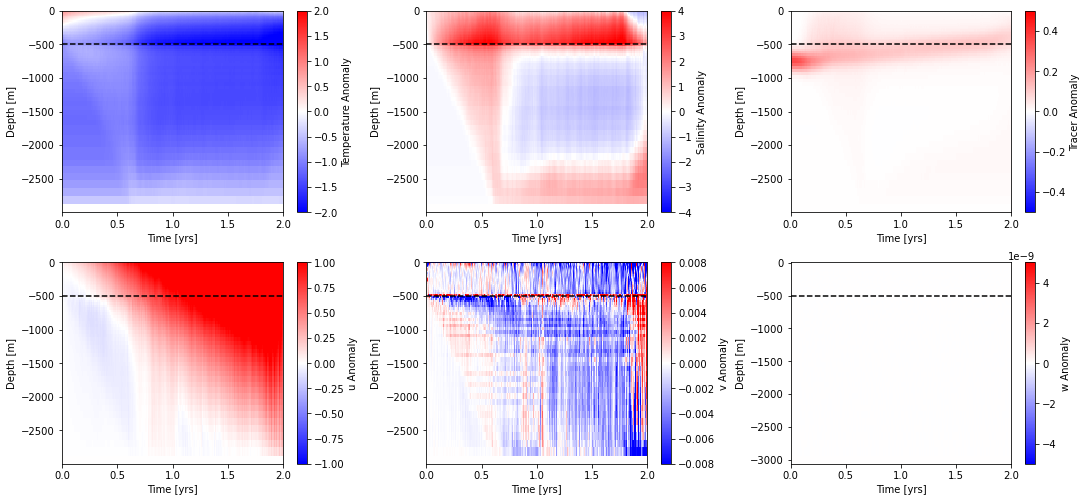

In [145]:
fig, axs = plt.subplots(2,3, figsize=(1/AR*5*3,AR*5*2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=0.32)
axs = axs.ravel() 

im = []
cb = []

im.append(axs[0].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zC, T_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-2, vmax=2))
axs[0].plot([0,2],[-500,-500], '--k')
im.append(axs[1].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zC, S_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-4, vmax=4))
axs[1].plot([0,2],[-500,-500], '--k')
im.append(axs[2].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zC, c_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-0.5, vmax=0.5))
axs[2].plot([0,2],[-500,-500], '--k')
im.append(axs[3].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zC, u_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-1, vmax=1))
axs[3].plot([0,2],[-500,-500], '--k')
im.append(axs[4].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zC, v_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-.008, vmax=.008))
axs[4].plot([0,2],[-500,-500], '--k')
im.append(axs[5].pcolormesh(np.arange(data_tracers.time.size)/365.25, data_tracers.zF, w_anomaly_profile.T,\
               cmap=plt.cm.bwr, vmin=-0.000000005, vmax=0.000000005))

axs[5].plot([0,2],[-500,-500], '--k')
for i in range(6):
    cb.append(plt.colorbar(im[i],ax=axs[i]))
    axs[i].set_ylabel('Depth [m]')
    axs[i].set_xlabel('Time [yrs]')
cb[0].set_label('Temperature Anomaly')
cb[1].set_label('Salinity Anomaly')
cb[2].set_label('Tracer Anomaly')
cb[3].set_label('u Anomaly')
cb[4].set_label('v Anomaly')
cb[5].set_label('w Anomaly')
plt.savefig('hor_avg_Hovmoller.png', bbox_inches='tight', dpi=300)
plt.show()

## Globally-averaged plots

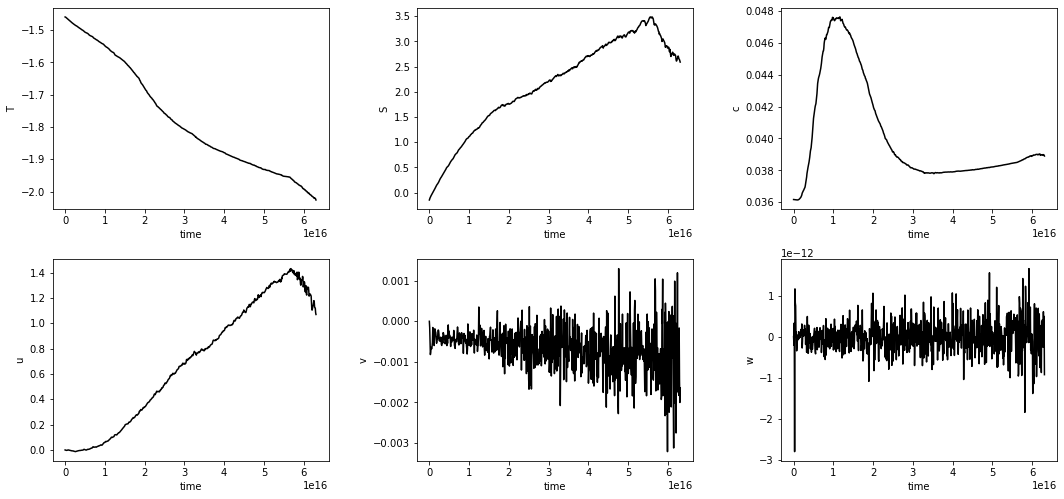

In [138]:
fig, axs = plt.subplots(2,3, figsize=(1/AR*5*3,AR*5*2), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=0.32)
axs = axs.ravel() 

data_tracers.T.mean('xC').mean('yC').mean('zC').plot(ax=axs[0], color='black', linestyle='-')
data_tracers.S.mean('xC').mean('yC').mean('zC').plot(ax=axs[1], color='black', linestyle='-')
data_tracers.c.mean('xC').mean('yC').mean('zC').plot(ax=axs[2], color='black', linestyle='-')
data_velocities.u.mean('xF').mean('yC').mean('zC').plot(ax=axs[3], color='black', linestyle='-')
data_velocities.v.mean('xC').mean('yF').mean('zC').plot(ax=axs[4], color='black', linestyle='-')
data_velocities.w.mean('xC').mean('yC').mean('zF').plot(ax=axs[5], color='black', linestyle='-')
plt.savefig('global_avg.png', bbox_inches='tight', dpi=300)

plt.show()



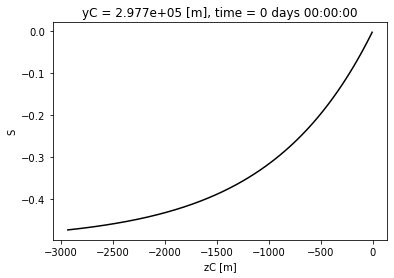

In [143]:
# data_tracers.S.mean('xC').isel(yC=-1).isel(time=0).plot(color='black', linestyle='-')
# plt.savefig('S_initial_profile.png', dpi=300, bbox_inches='tight')
# plt.show()